In [1]:
import pandas as pd
import numpy as np
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sb

# setting device to GPU

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# importing data 

In [3]:
file = "c:\\Users\\User\\Pictures\\work\\python folder\\GPA.csv"
data = pd.read_csv(file)
data.sample(2)

,SAT,GPA
18,1842,3.17
2,1760,2.54


In [4]:
x = data["SAT"]
y = data["GPA"]

<AxesSubplot:xlabel='SAT', ylabel='GPA'>

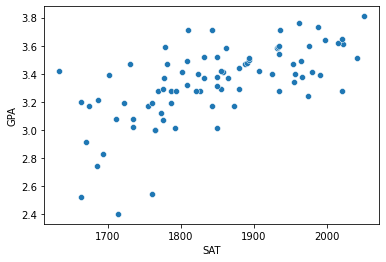

In [5]:
sb.scatterplot(x = x , y = y)

In [6]:
class scaler:
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

def get_scaler(row):
    mean = np.mean(row)
    std = np.std(row)
    return scaler(mean, std)


def standardize(data, scaler):
        return (data - scaler.mean) / scaler.std

# Creating tensors

In [7]:
x_ = torch.FloatTensor(x.to_numpy(dtype="float32" ).reshape(-1 , 1))
y_ = torch.FloatTensor(y.to_numpy(dtype="float32" ).reshape(-1 , 1))


# Creating Neural Network model

In [8]:
class Model(nn.Module):
    
    def __init__ (self , infeature = 1  , outfeature = 1):
        super().__init__()
        
        self.fc1 = nn.Linear(infeature , outfeature)
       
        
    def forward(self ,x):
        x1 = (self.fc1(x))
    
        
        return x1

# Creating random weights and baises

In [9]:
torch.manual_seed(25)

model = Model()

print(model)


Model(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)


# Moving the model to GPU

In [10]:
model.to(device)

Model(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)

# Printing Parameters of Model

In [11]:
for name , param in model.named_parameters():
    print (name , param)

fc1.weight Parameter containing:
tensor([[0.5036]], device='cuda:0', requires_grad=True)
fc1.bias Parameter containing:
tensor([-0.6142], device='cuda:0', requires_grad=True)


# Defining the criterian and optimizer

In [12]:
criterian = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters() , lr=0.00021)



# Moving data to GPU


In [13]:
x_ = x_.to(device)
y_ = y_.to(device)

# Training the model

In [14]:
epochs = 50000
losses = []

for i in range(epochs):
    i = i + 1
    y_pred = model.forward(x_)
    loss = criterian(y_pred , y_)
    losses.append(loss)
    
   # print(i , loss.item())
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    
        

# moving values of loss to CPU and Ploting

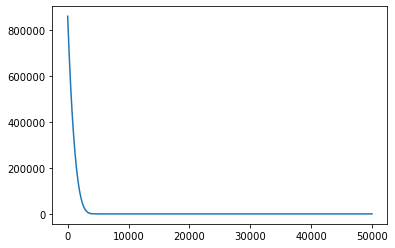

In [15]:
loss = torch.tensor(losses)
loss.cpu()

plt.plot(range(epochs) , loss)

# The value of weights and baise after training the model

In [16]:
model.state_dict()

OrderedDict([('fc1.weight', tensor([[0.0018]], device='cuda:0')),
             ('fc1.bias', tensor([0.0275], device='cuda:0'))])

In [17]:
model.eval()

Model(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)

In [18]:
weight = model.fc1.weight
baise = model.fc1.bias

print(weight)
print(baise)

Parameter containing:
tensor([[0.0018]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([0.0275], device='cuda:0', requires_grad=True)


# moving the predicted values to cpu

In [19]:
prey_y = weight * x_ + baise
prey_y = prey_y.cpu()

# Plotting the data using seaborn

<AxesSubplot:xlabel='SAT', ylabel='GPA'>

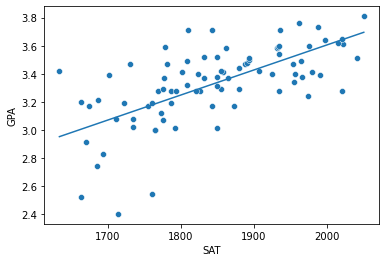

In [20]:
sb.scatterplot(x = x , y = y)
sb.lineplot(y = prey_y.detach().numpy().flatten() , x = x)

# Regression using seaborn

<AxesSubplot:xlabel='SAT', ylabel='GPA'>

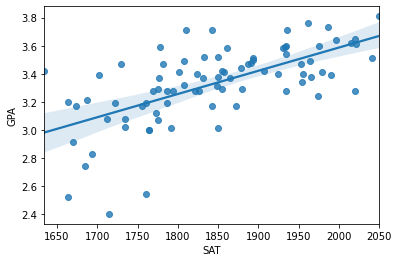

In [21]:
sb.regplot(x = x , y = y)